In [3]:
#from google.colab import drive
#import sys
#import importlib

import pandas as pd
import numpy as np
#import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ------------------------------------------ РОБОТА З GOOGLE DRIVE ------------------------------------------

In [ ]:
# підключення або перепідключення до гугл диску (забезпечення повного підключення і з оновленими змінами)

from google.colab import drive
drive.flush_and_unmount() # відключення від гугл диску(якщо підключення було)
drive.mount('/content/drive', force_remount=True) # підключаюся до гугл диску знову

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
# список файлів у моїй папці проекту в гугл диску і вивід перших кількох стрічок(для переконання, що отримано найновіші версії файлів)

!ls -l "/content/drive/MyDrive/Coursework/book_recommender_project"
!cat "/content/drive/MyDrive/Coursework/book_recommender_project/processing/ratings_processing.py" | tail -n 20

total 4897
-rw------- 1 root root 1109861 May 12 09:01 coursework_copy.ipynb
-rw------- 1 root root  909455 May 12 10:48 coursework.ipynb
drwx------ 2 root root    4096 May 12 10:33 data
-rw------- 1 root root    1638 Apr 16 14:17 data_loader.py
-rw------- 1 root root    1278 Apr 16 16:12 data_preprocessing.py
-rw------- 1 root root       0 Apr 17 18:08 data_processing.py
-rw------- 1 root root 1223135 May  7 16:53 from_github.ipynb
-rw------- 1 root root    1443 Apr 16 14:10 main.py
-rw------- 1 root root 1749113 Apr 23 16:08 old_coursework.ipynb
drwx------ 3 root root    4096 Apr 17 17:28 processing
drwx------ 2 root root    4096 Apr 13 16:02 __pycache__
drwx------ 3 root root    4096 Apr 17 17:29 visualization
import pandas as pd


def merge_books_and_ratings(books_df, ratings_df):
    return pd.merge(ratings_df, books_df, on="ISBN")


In [ ]:
# додає шлях до мого проекту в список шляхів, де пайтон шукає модулі для імпорту. це треба щоб мати змогу імпортувати власні файли, ніби вони є частиною встановленого пакета

import sys
sys.path.append('/content/drive/MyDrive/Coursework/book_recommender_project')

 # ----------------------------------------- ОЗНАЙОМЛЕННЯ З ДАНИМИ -----------------------------------------

In [1]:
# вивід розмірностей і перші кілька рядків з csv файлів(таблиць)

from main import show_data
import importlib
import main
importlib.reload(main)

show_data()

Завантажую дані...
Завантаження книг...


D:\Daria\University\3 course\6 term\book_recommender_project\data_loader.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(DATA_DIR, 'Books.csv'), encoding='latin-1')


Кількість книг: 271360
Завантаження рейтингів...
Кількість рейтингів: 1149780
Завантаження користувачів...
Кількість користувачів: 278858
Завантаження книг...


D:\Daria\University\3 course\6 term\book_recommender_project\data_loader.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(DATA_DIR, 'Books.csv'), encoding='latin-1')


Завантаження рейтингів...
Завантаження користувачів...

Дані про книги (розмірність: 271360 рядків, 8 стовпців): 
Перші кілька рядків даних про книги:
+---+------------+----------------------------------------------------------------------------------------------------+----------------------+---------------------+----------------------------+--------------------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------+
|   |    ISBN    |                                             Book-Title                                             |     Book-Author      | Year-Of-Publication |         Publisher          |                         Image-URL-S                          |                         Image-URL-M                          |                         Image-URL-L                          |
+---+------------+-----------------------------------------------------------------

In [4]:
# вивід аналізу таблиць

from main import analyzing_data
import main
analyzing_data()

Завантаження книг...


D:\Daria\University\3 course\6 term\book_recommender_project\data_loader.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(DATA_DIR, 'Books.csv'), encoding='latin-1')


Завантаження рейтингів...
Завантаження користувачів...

------------------ Аналіз таблиці Books ------------------
Розмірність: 271360 рядків, 8 стовпців

Типи даних по стовпцях:
+---------------------+--------+
|      Стовпець       |  Тип   |
+---------------------+--------+
|        ISBN         | object |
|     Book-Title      | object |
|     Book-Author     | object |
| Year-Of-Publication | object |
|      Publisher      | object |
|     Image-URL-S     | object |
|     Image-URL-M     | object |
|     Image-URL-L     | object |
+---------------------+--------+

Відсутні значення по стовпцях:
+---------------------+----------------------+
|      Стовпець       | Кількість пропущених |
+---------------------+----------------------+
|        ISBN         |          0           |
|     Book-Title      |          0           |
|     Book-Author     |          2           |
| Year-Of-Publication |          0           |
|      Publisher      |          2           |
|     Image-URL-S

# ------------------------------------------ РОБОТА З ТАБЛИЦЕЮ Books ------------------------------------------

Тут я заповнила відсутні дані та відредагувала деякі дані в певних стовпцях

In [5]:
# вивід конктретних рядків з пропущеними значеннями в таблиці Books

from processing.books_processing import find_missing_values_in_books

import processing.books_processing as books_processing
import data_loader
import importlib

importlib.reload(data_loader)
importlib.reload(books_processing)

books_processing.find_missing_values_in_books()

Завантажую дані...
Завантаження книг...


D:\Daria\University\3 course\6 term\book_recommender_project\data_loader.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(DATA_DIR, 'Books.csv'), encoding='latin-1')


Кількість книг: 271360
Завантаження рейтингів...
Кількість рейтингів: 1149780
Завантаження користувачів...
Кількість користувачів: 278858
Завантаження книг...

Пропущені значення по стовпцях:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Знайдено 7 рядків з пропущеними значеннями у таблиці книг: 
+--------+------------+-------------------------------------------------------------------------------------------------------------+-----------------+---------------------+--------------------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------+
|        |    ISBN    |                                                 Book-Title                          

D:\Daria\University\3 course\6 term\book_recommender_project\data_loader.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(DATA_DIR, 'Books.csv'), encoding='latin-1')


In [6]:
# вивід трьох рядків, де дані записані із зсувом

from data_loader import load_books

books_df = load_books()
books_df[books_df['ISBN'].isin(['078946697X', '2070426769', '0789466953'])]

Завантаження книг...


D:\Daria\University\3 course\6 term\book_recommender_project\data_loader.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(DATA_DIR, 'Books.csv'), encoding='latin-1')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [7]:
# редагування рядків з пропущеними значеннями

from processing.books_processing import fix_known_errors_in_books

books_df = load_books()
books_df = fix_known_errors_in_books(books_df)

Завантаження книг...


D:\Daria\University\3 course\6 term\book_recommender_project\data_loader.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(DATA_DIR, 'Books.csv'), encoding='latin-1')


In [8]:
# повторний пошук пропущених значень у виправленій таблиці

from processing.books_processing import find_missing_values_in_books_fixed

find_missing_values_in_books_fixed()

Завантаження книг...

Пропущені значення по стовпцях у виправленій таблиці:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Знайдено 0 рядків з пропущеними значеннями у виправленій таблиці книг:
+------+------------+-------------+---------------------+-----------+-------------+-------------+-------------+
| ISBN | Book-Title | Book-Author | Year-Of-Publication | Publisher | Image-URL-S | Image-URL-M | Image-URL-L |
+------+------------+-------------+---------------------+-----------+-------------+-------------+-------------+
+------+------------+-------------+---------------------+-----------+-------------+-------------+-------------+


In [10]:
# 🔍ПЕРЕВІРКА🔍 чи виводиться попередження DtypeWarning: Columns (3) have mixed types - у стовпці 3 (Year-Of-Publication) змішані типи

#pd.read_csv('/content/drive/MyDrive/З КУРС/3.2./Coursework/book_recommender_project/data/Books.csv').head(1)
pd.read_csv('data/Books.csv').head(1)

C:\Users\daria\AppData\Local\Temp\ipykernel_13756\3827198228.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('data/Books.csv').head(1)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [11]:
# 🔍ПЕРЕВІРКА🔍 у виправленій таблиці попередження немає, отже проблему виправлено

#pd.read_csv('/content/drive/MyDrive/З КУРС/3.2./Coursework/book_recommender_project/data/Books_fixed.csv').head(1)
pd.read_csv('data/Books_fixed.csv').head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


## Роки

In [12]:
# перевірка перших 20 найбільших років
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('int64')
books_df['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

Year-Of-Publication
2050        2
2038        1
2037        1
2030        7
2026        1
2024        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       46
2004     5839
2003    14359
2002    17627
2001    17359
2000    17234
1999    17431
Name: count, dtype: int64

Тут бачимо, що є дивні роки по типу 2026, 2030, 2037, 2038, 2050

In [13]:
# перевірка записів у яких рік більше, ніж 2021
books_df[books_df['Year-Of-Publication']>2021][['ISBN', 'Book-Title','Year-Of-Publication','Publisher','Book-Author']]

,ISBN,Book-Title,Year-Of-Publication,Publisher,Book-Author
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,2030,Aladdin,Coville
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,2030,Aladdin,Bruce Coville
78168,0870449842,Crossing America,2030,National Geographic,National Geographic Society
80264,0140301690,Alice's Adventures in Wonderland and Through t...,2050,Puffin Books,Lewis Carroll
97826,0140201092,Outline of European Architecture (Pelican S.),2050,Penguin USA,Nikolaus Pevsner
116053,0394701658,Three Plays of Eugene Oneill,2038,Vintage Books USA,Eugene O'Neill
118294,3442436893,Das groÃ?Ã?e BÃ?ÃÂ¶se- MÃ?ÃÂ¤dchen- Lese...,2026,Goldmann,Kathy Lette
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",2030,National Geographic,National Geographic Society
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),2030,Simon &amp; Schuster,Colin M. Turnbull
240169,0684718022,In Our Time: Stories (Scribner Classic),2030,Collier Books,Ernest Hemingway


In [14]:
# редагування неправильних значень
importlib.reload(books_processing)
from processing.books_processing import edit_years
books_df = edit_years(books_df)

In [15]:
# 🔍ПЕРЕВІРКА🔍 чи всі значення добре записалися

books_df[books_df['ISBN'].isin(['0671746103', '0671791990', '0870449842', '0140301690', '0140201092', '0394701658',
    '3442436893', '0870446924', '0671266500', '0684718022', '0380000059', '068471809X', '0671740989'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Bruce Coville,1991,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2005,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2001,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2003,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,1981,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,1995,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das große Böse - Mädchen- Lesebuch,Kathy Lette,2006,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2003,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,1987,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,1996,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...


In [16]:
# перевірка останніх і перших 20 наймеших років

display(books_df['Year-Of-Publication'].value_counts().sort_index().iloc[:20])
books_df['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

Year-Of-Publication
0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
Name: count, dtype: int64

Year-Of-Publication
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        4
2005       47
2004     5839
2003    14361
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
1993    10602
Name: count, dtype: int64

## Автори

In [17]:
# по скільки книг мають першв 20 авторів
author_book_count = books_df['Book-Author'].value_counts()
print(author_book_count.head(20))

Book-Author
Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: count, dtype: int64


D:\Daria\University\3 course\6 term\book_recommender_project\visualization\books_visualization.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns_plot = sns.barplot(y=top_authors.index, x=top_authors.values, palette=colors, orient='h')


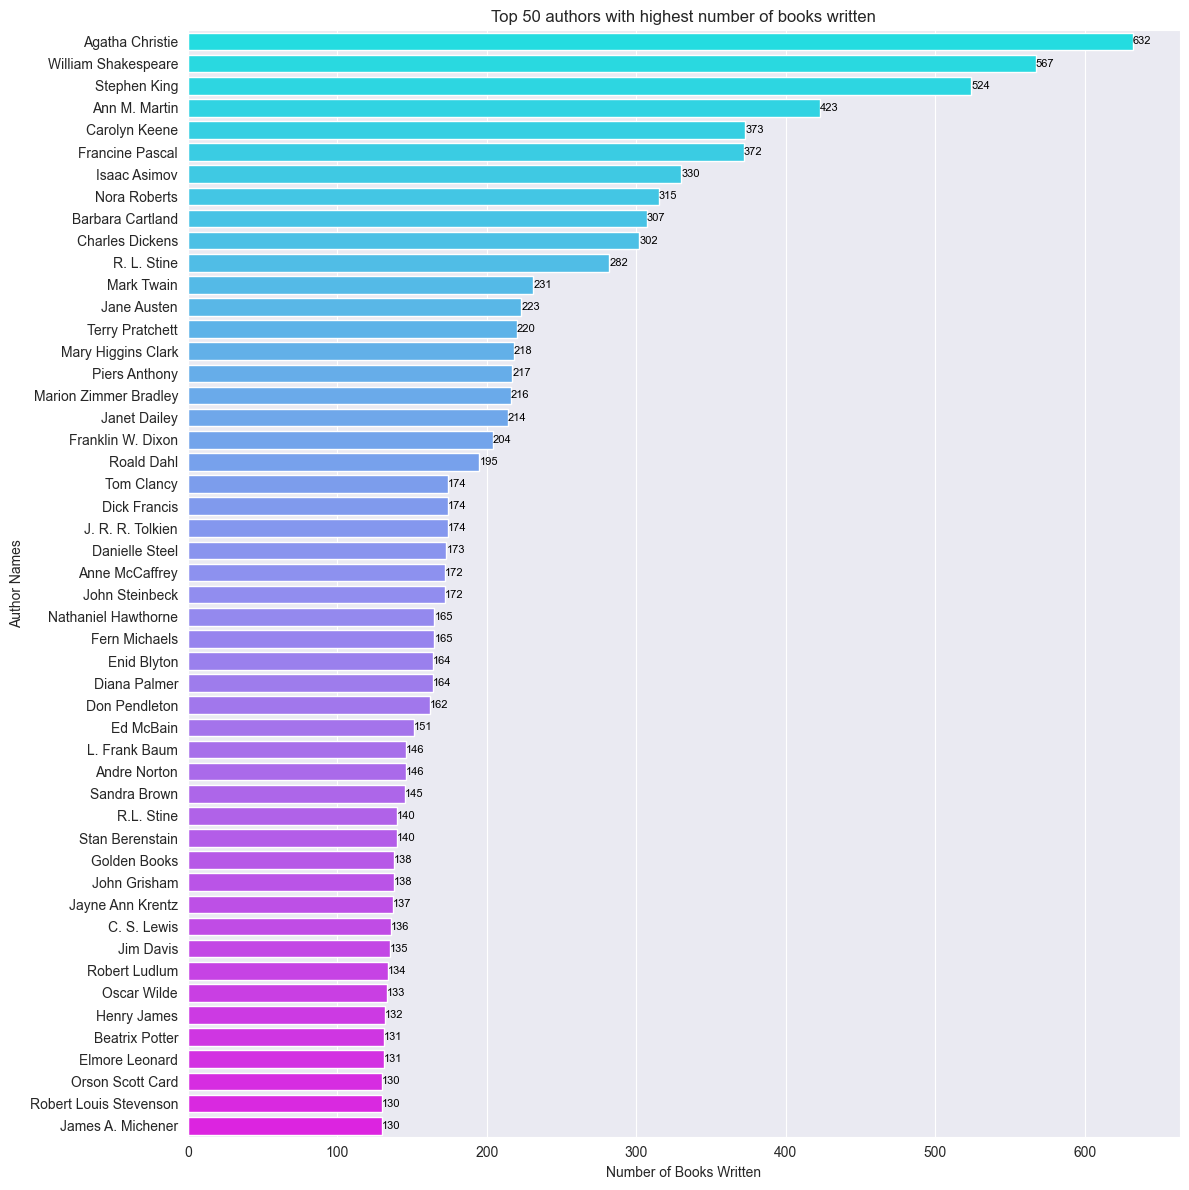

In [18]:
from visualization.books_visualization import plot_top_authors

# фільтрація і вивід 50 авторів без Not Applicable (Na )

importlib.reload(books_processing)
from processing.books_processing import get_top_authors
top_authors = get_top_authors(books_df, top_n=50)
plot_top_authors(top_authors)

In [19]:
num_missing_authors = books_df['Book-Author'].isna().sum()
print(f"Кількість порожніх значень у колонці Book-Author: {num_missing_authors}")

Кількість порожніх значень у колонці Book-Author: 0


## Видавництва

In [21]:
import importlib
import visualization.books_visualization as bv
importlib.reload(bv)
bv.plot_top_publishers(get_top_authors, top_n=50)

AttributeError: 'function' object has no attribute 'sort_values'

In [ ]:
# завантаження виправленої таблиці в окремий файл Books_fixed.csv
from processing.books_processing import save_fixed_books
books_processing.save_fixed_books(books_df, '/content/drive/MyDrive/З КУРС/3.2./Coursework/book_recommender_project/data/Books_fixed.csv')

# ------------------------------------------ РОБОТА З ТАБЛИЦЕЮ Users ------------------------------------------

In [24]:
import processing

# У колонці Age було дуже багато пропущених даних. Тому я збережу копію таблиці юзерів з віком на майбутнє, а в основному буду працювати з таблицею без віку
importlib.reload(processing.users_processing)
from processing.users_processing import (save_users_with_age, remove_age_and_save_users)
save_users_with_age()
remove_age_and_save_users()

AttributeError: module 'processing' has no attribute 'users_processing'

# ----------------------------------------- РОБОТА З ТАБЛИЦЕЮ Ratings -----------------------------------------

In [25]:
# вивід перших 5 записів таблиці Ratings

ratings_df = pd.read_csv('data/Ratings.csv')
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# вивід розмірностей
display(books_df.shape)
display(ratings_df.shape)

(271360, 8)

(1149780, 3)

In [26]:
# з'єднання книг і рейтингів
import importlib
import processing.ratings_processing as ratings_processing
importlib.reload(ratings_processing)

from processing.ratings_processing import merge_books_and_ratings
bookRating = merge_books_and_ratings(books_df, ratings_df)
bookRating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [ ]:
bookRating.shape

(1031136, 10)

In [27]:
# видалення колонок з посиланнями зображень

importlib.reload(ratings_processing)

from processing.ratings_processing import drop_image_columns
bookRating.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)
bookRating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


In [ ]:
# ОБРАХУВАННЯ СЕРЕДНЬОГО РЕЙТИНГУ ПО КОЖНІЙ КНИЗІ

In [28]:
# для кожної книги обчислюється середній рейтинг
averageRating = pd.DataFrame(bookRating.groupby('ISBN')['Book-Rating'].mean().round(1))
averageRating.reset_index(inplace=True)
averageRating.head()

,ISBN,Book-Rating
0,0000913154,8.0
1,0001010565,0.0
2,0001046438,9.0
3,0001046713,0.0
4,000104687X,6.0


In [ ]:
averageRating.shape

(270151, 2)

In [29]:
# перейменювання колонок
averageRating.rename(columns={'Book-Rating':'Average-Rating'}, inplace=True)
averageRating.head()

,ISBN,Average-Rating
0,0000913154,8.0
1,0001010565,0.0
2,0001046438,9.0
3,0001046713,0.0
4,000104687X,6.0


In [30]:
# об'єднання середнього рейингу назад з повною таблицею
averageRatingdf = pd.merge(bookRating, averageRating, on='ISBN')
averageRatingdf.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average-Rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,2.5
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,4.1
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,3.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,6.0


In [ ]:
averageRatingdf.shape

(1031136, 8)

In [31]:
# тут ще averageRatingdf має багато рядків для однієї книги
averageRatingOnly = averageRatingdf[['ISBN','Average-Rating']]
averageRatingOnly.head()

,ISBN,Average-Rating
0,034545104X,2.9
1,0155061224,2.5
2,0446520802,4.1
3,052165615X,3.0
4,0521795028,6.0


In [32]:
# тому тут видаляються дублікати
averageRatingUnique = averageRatingOnly[['ISBN','Average-Rating']].drop_duplicates(subset=['ISBN'])
averageRatingUnique.head()

,ISBN,Average-Rating
0,034545104X,2.9
1,0155061224,2.5
2,0446520802,4.1
3,052165615X,3.0
4,0521795028,6.0


In [33]:
ratingBooks = pd.merge(books_df, averageRatingUnique, on='ISBN', how='inner')

In [ ]:
display(books_df.shape)
averageRatingUnique.shape

(271360, 8)

(270151, 2)

In [34]:
# об'єднання всіх книг з їхніми середніми рейтингами. фінальна таблиця books_with_rating

books_with_rating = pd.merge(books_df, averageRatingUnique, on='ISBN')
books_with_rating.shape

(270151, 9)

In [ ]:
books_with_rating = books_with_rating[['ISBN','Book-Title','Book-Author','Average-Rating','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']]
books_with_rating.head()

,ISBN,Book-Title,Book-Author,Average-Rating,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,0.0,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,4.9,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,5.0,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,4.3,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,0.0,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# топ 30 книг з найвищим рейтингом
books_with_rating.sort_values(by=['Average-Rating'], ascending=False).head(30)

,ISBN,Book-Title,Book-Author,Average-Rating,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
270138,0395264707,Dreamsnake,Vonda N. McIntyre,10.0,1978,Houghton Mifflin,http://images.amazon.com/images/P/0395264707.0...,http://images.amazon.com/images/P/0395264707.0...,http://images.amazon.com/images/P/0395264707.0...
77197,0312861605,The Dragon and the Fair Maid of Kent,Gordon R. Dickson,10.0,2000,Tor Books,http://images.amazon.com/images/P/0312861605.0...,http://images.amazon.com/images/P/0312861605.0...,http://images.amazon.com/images/P/0312861605.0...
77210,1582460507,First Book of Sushi (World Snacks),Amy Wilson Sanger,10.0,2001,Tricycle Press,http://images.amazon.com/images/P/1582460507.0...,http://images.amazon.com/images/P/1582460507.0...,http://images.amazon.com/images/P/1582460507.0...
77211,1402708610,I Know a Rhino,Charles Fuge,10.0,2003,Sterling,http://images.amazon.com/images/P/1402708610.0...,http://images.amazon.com/images/P/1402708610.0...,http://images.amazon.com/images/P/1402708610.0...
77213,1553690257,An Ia Story: One Thread in the Tapestry of Con...,S. A. Stanley,10.0,2002,Not Avail,http://images.amazon.com/images/P/1553690257.0...,http://images.amazon.com/images/P/1553690257.0...,http://images.amazon.com/images/P/1553690257.0...
77217,1591132177,Outcast,Michael Woods,10.0,2002,Booklocker.com,http://images.amazon.com/images/P/1591132177.0...,http://images.amazon.com/images/P/1591132177.0...,http://images.amazon.com/images/P/1591132177.0...
77220,0413743802,The Hunting of the Snark: An Agony in Eight Fits,Lewis Carroll,10.0,2002,Methuen,http://images.amazon.com/images/P/0413743802.0...,http://images.amazon.com/images/P/0413743802.0...,http://images.amazon.com/images/P/0413743802.0...
270089,1584855096,Amelia's School Survival Guide (Amelia),Marissa Moss,10.0,2002,Pleasant Company Publications,http://images.amazon.com/images/P/1584855096.0...,http://images.amazon.com/images/P/1584855096.0...,http://images.amazon.com/images/P/1584855096.0...
270092,1584857447,True Stories: Girls' Inspiring Stories of Cour...,Trula Magruder,10.0,2003,American Girl,http://images.amazon.com/images/P/1584857447.0...,http://images.amazon.com/images/P/1584857447.0...,http://images.amazon.com/images/P/1584857447.0...
270093,1893699056,"Mayhem on Mackinac Island (Michigan Chillers, 1)",Johnathan Rand,10.0,2000,Audio Craft Press,http://images.amazon.com/images/P/1893699056.0...,http://images.amazon.com/images/P/1893699056.0...,http://images.amazon.com/images/P/1893699056.0...


In [ ]:
# скільки книг мають кожен з середніх рейтингів

ratings_sorted = books_with_rating['Average-Rating'].value_counts().sort_index(ascending=False)
display(ratings_sorted)
books_with_rating['Average-Rating'].value_counts(normalize=True).round(4).sort_index(ascending=False)

,count
Average-Rating,
10.0,13112
9.8,14
9.7,48
9.6,2
9.5,489
9.4,6
9.3,76
9.2,22
9.1,2


,proportion
Average-Rating,
10.0,0.0485
9.8,0.0001
9.7,0.0002
9.6,0.0000
9.5,0.0018
9.4,0.0000
9.3,0.0003
9.2,0.0001
9.1,0.0000


/content/drive/MyDrive/З КУРС/3.2./Coursework/book_recommender_project/visualization/ratings_visualization.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_sorted.index, y=ratings_sorted.values ,palette=cool)
/content/drive/MyDrive/З КУРС/3.2./Coursework/book_recommender_project/visualization/ratings_visualization.py:9: UserWarning: The palette list has more values (100) than needed (99), which may not be intended.
  sns.barplot(x=ratings_sorted.index, y=ratings_sorted.values ,palette=cool)


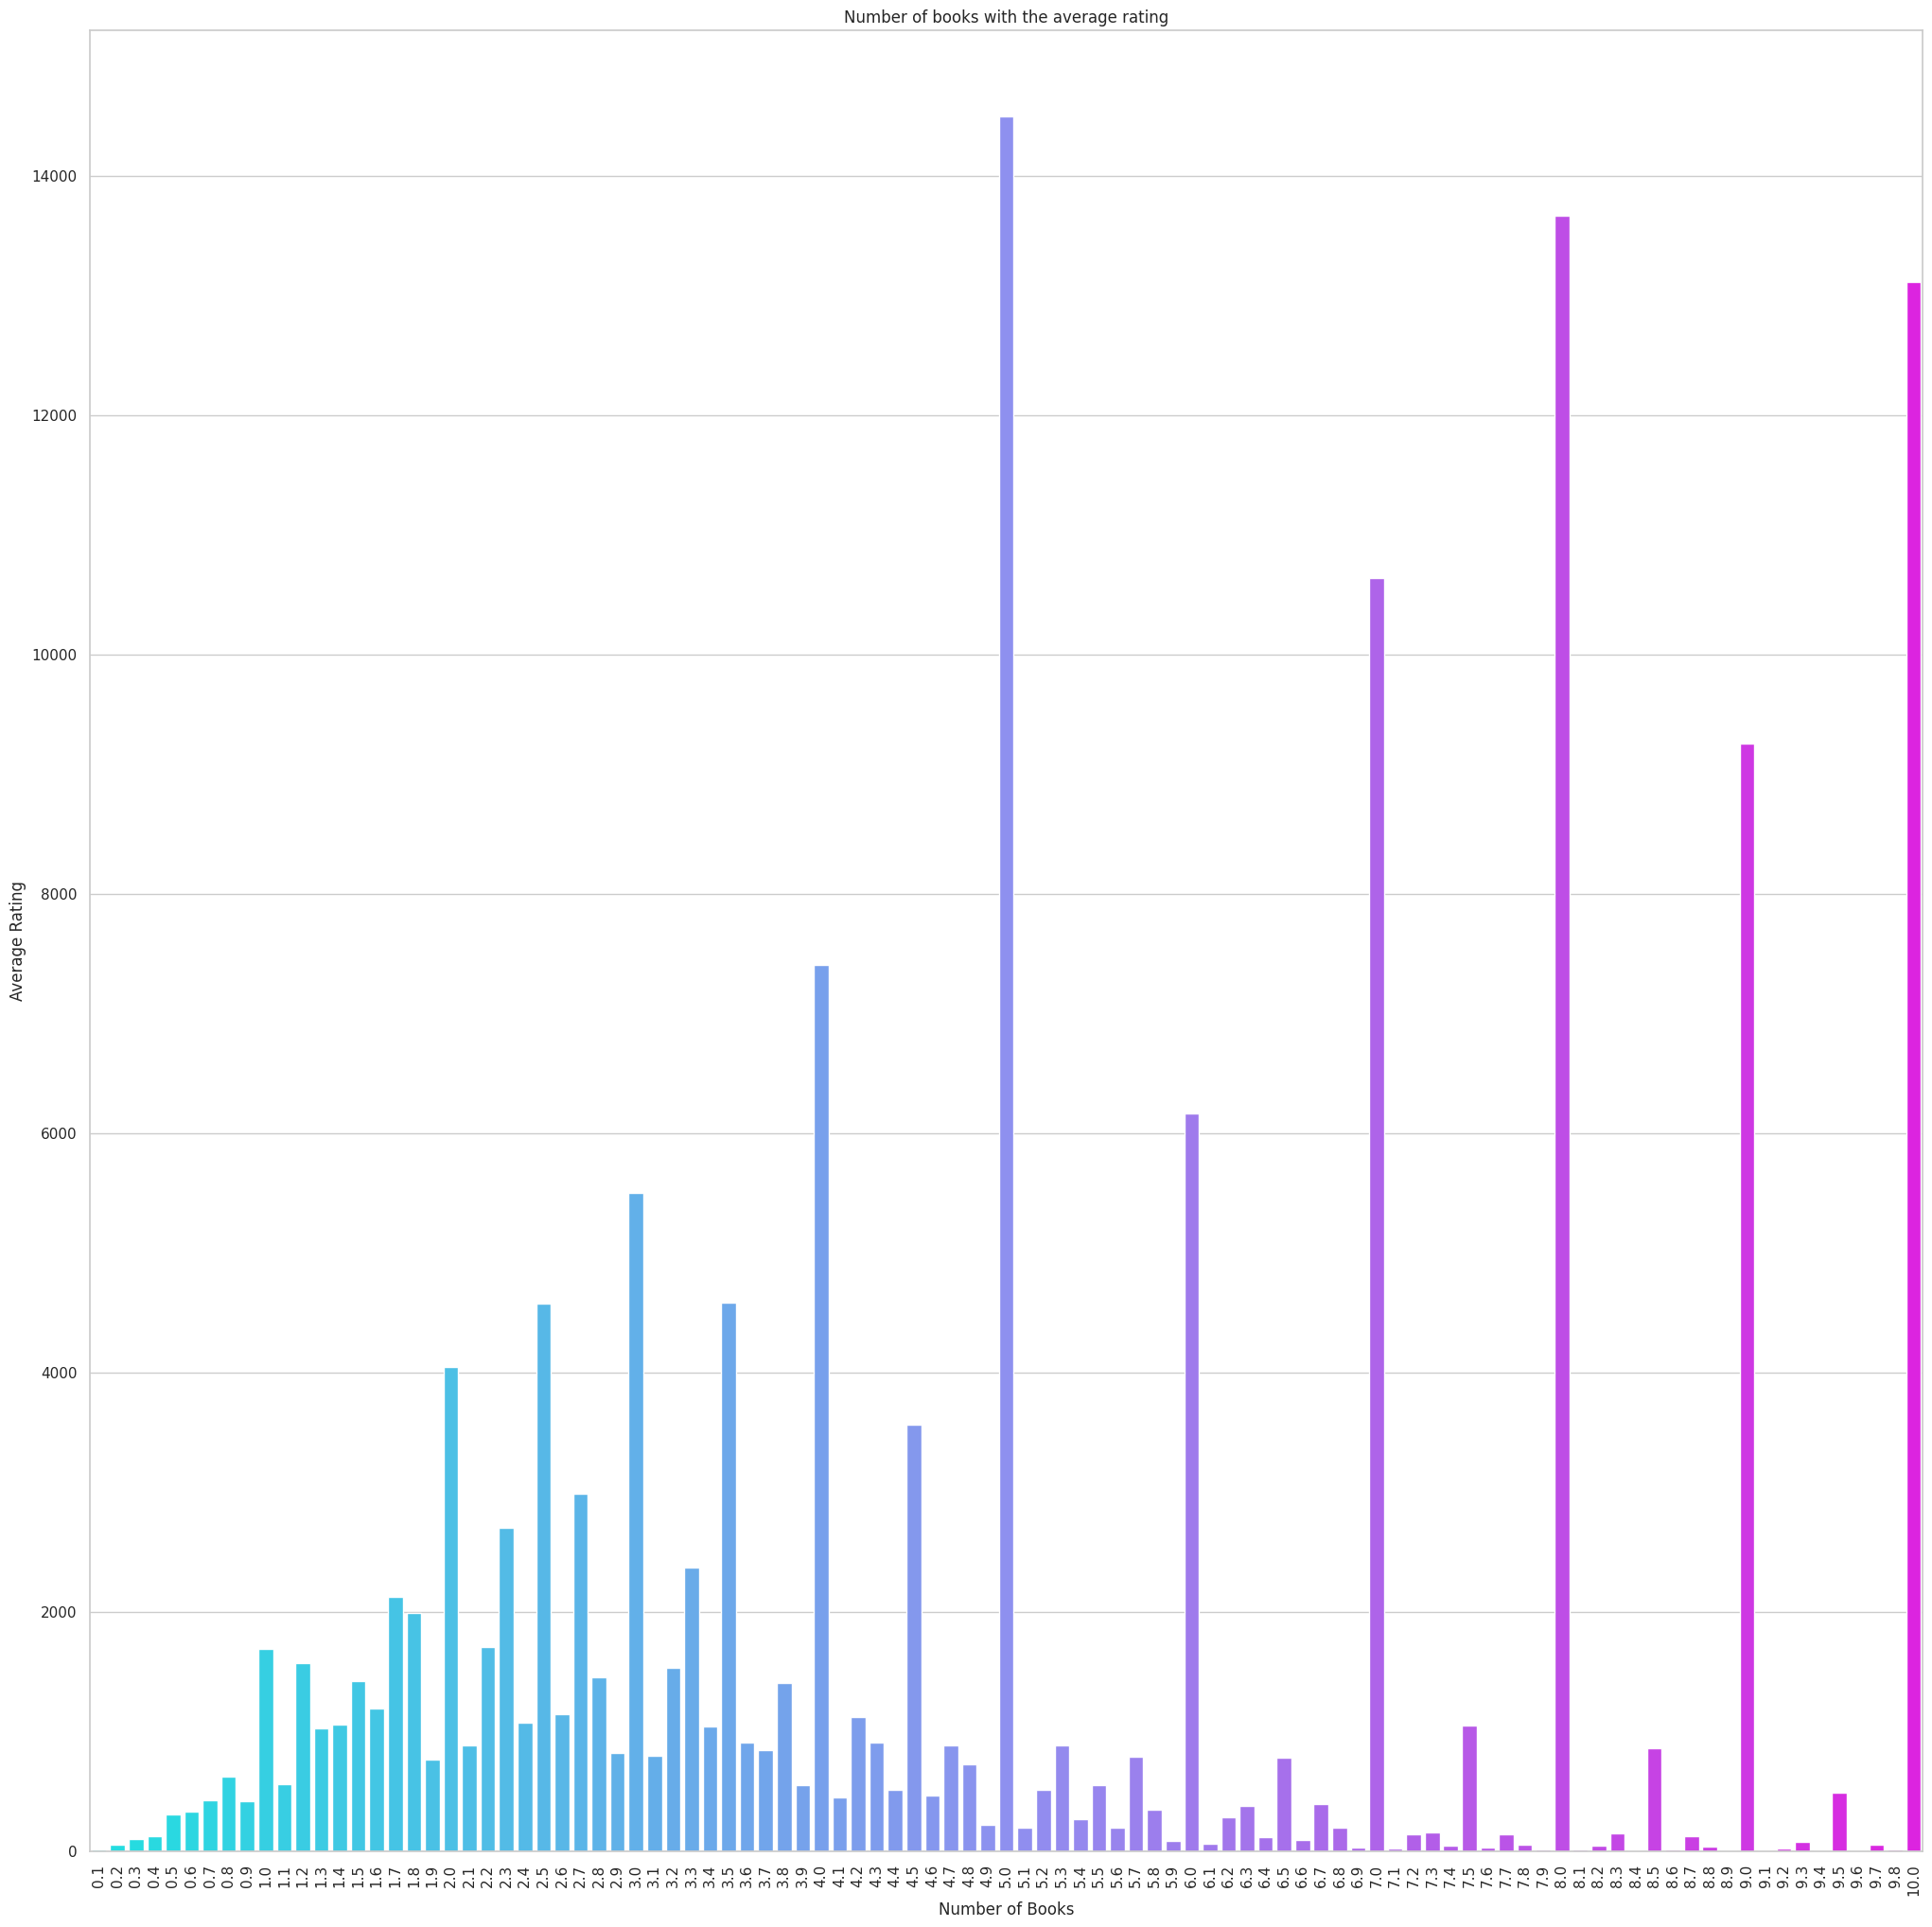

In [ ]:
# побудова графіку з середнім рейтингом
import importlib
import visualization.ratings_visualization as rv
importlib.reload(rv)
rv.plot_average_rating_distribution(ratings_sorted)

# ----------------------------------------- ГРАФІКИ ДЛЯ ПРЕДСТАВЛЕННЯ ДАНИХ -----------------------------------------

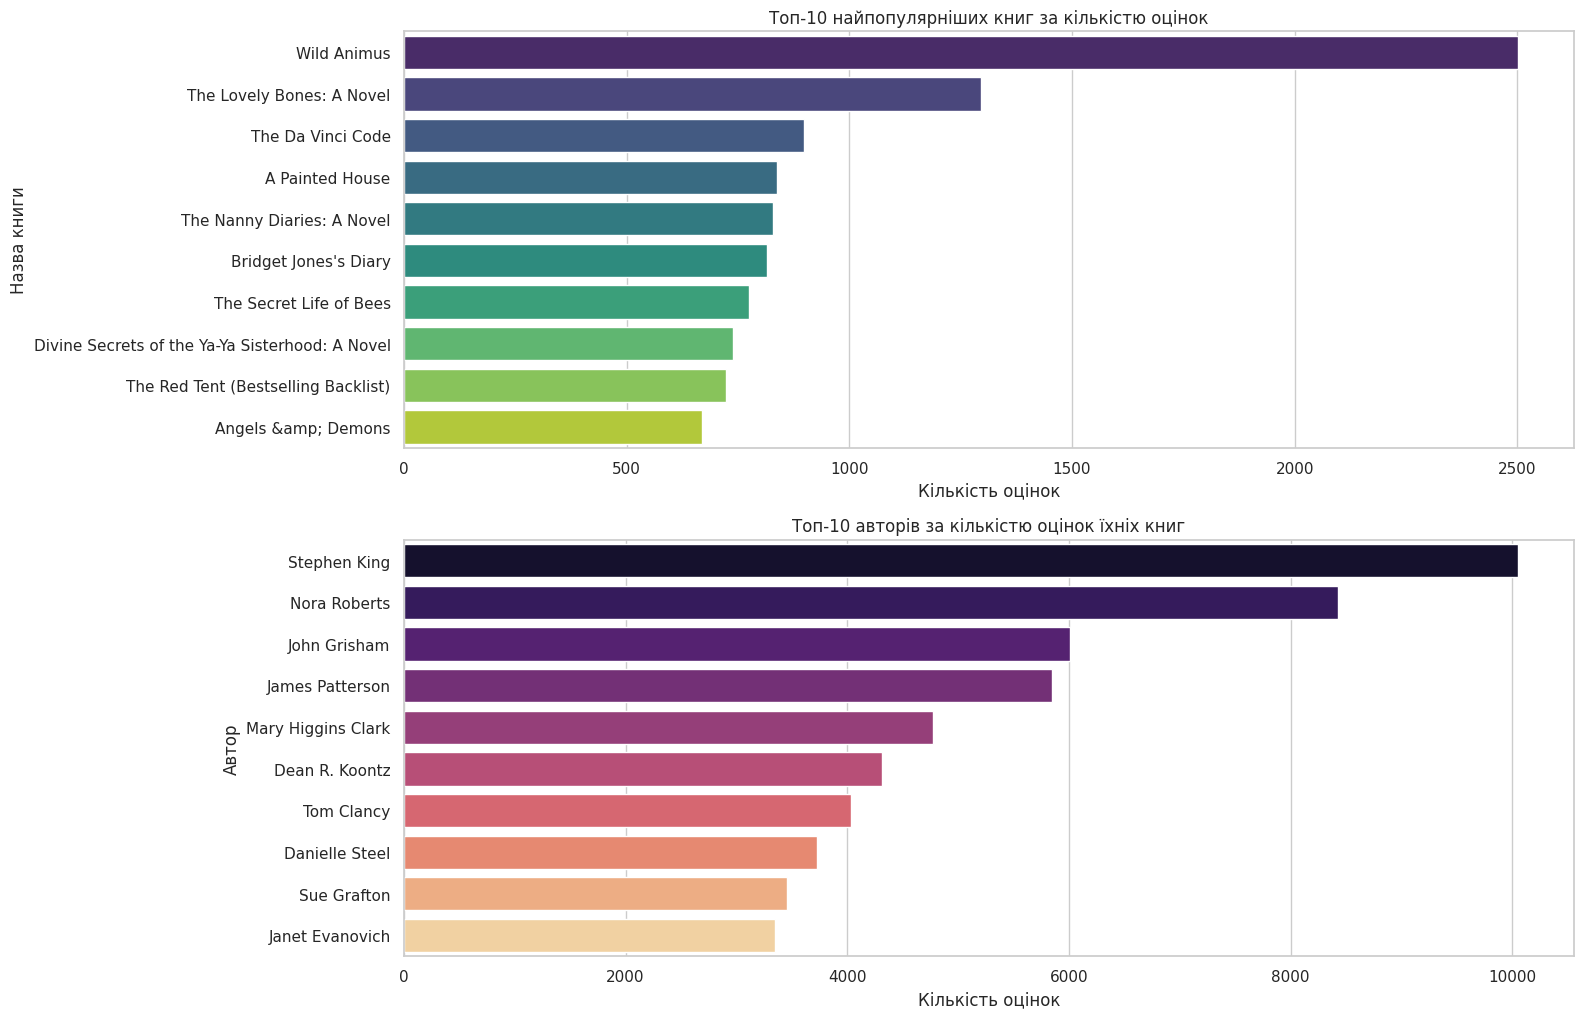

In [ ]:
# графіки


sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# --- 1. найпопулярніші книги ---
plt.subplot(4, 1, 1)
top_books = bookRating['Book-Title'].value_counts().head(10)
sns.barplot(x=top_books.values, y=top_books.index, hue=top_books.index, palette='viridis', legend=False)
plt.title('Топ-10 найпопулярніших книг за кількістю оцінок')
plt.xlabel('Кількість оцінок')
plt.ylabel('Назва книги')

# --- 2. найпопулярніші автори ---
plt.subplot(4, 1, 2)
top_authors_by_ratings = bookRating['Book-Author'].value_counts().head(10)
sns.barplot(x=top_authors_by_ratings.values, y=top_authors_by_ratings.index, hue=top_authors_by_ratings.index, palette='magma', legend=False)
plt.title('Топ-10 авторів за кількістю оцінок їхніх книг')
plt.xlabel('Кількість оцінок')
plt.ylabel('Автор')

plt.tight_layout()
plt.show()

# ----------------------------------------- СТВОРЕННЯ І НАВЧАННЯ МОДЕЛІ ----------------------------------

## Підхід на основі спільної фільтрації
для системи рекомендацій на основі користувачів створюється новий тип даних, наприклад:

кожен користувач матиме оцінку для кожної книги, і будуть дотримуватися такі критерії, як:

1. Цінність оцінок досвідчених користувачів: взяти оцінки користувачів, які оцінили понад 200 книг

2. Цінність книг з високими оцінками: рекомендація книг, які мають понад 50 оцінок, тобто популярні та відомі книги

# Робота моделі:

кожна книга представлена як точка, утворена вектором, використовуючи користувачів. тобто кожна книга представлена як рейтинг юзера, який проголосував більше, ніж 200 разів. в цьому випадку це 816 юзерів

після представлення їх як косинусних векторів можна далі прожовжувати використовувати косинусну подібність як міру подібност

# Створення функції

створюю функцію, яка може рекомендувати книги на основі заданої схожості

In [64]:
from web.rec_model import BookRecommender
import pandas as pd

# Завантаження змердженого датафрейму
books_path = ('data/Books_fixed.csv')
ratings_path = ('data/Ratings.csv')

books = pd.read_csv(books_path)
ratings = pd.read_csv(ratings_path)

ratings_books_merged = ratings.merge(books, on='ISBN') 

# Створення моделі
model = BookRecommender(ratings_books_merged)

def print_recommendations(book_name):
    recommendations = model.recommend(book_name)
    if not recommendations:
        print(f'Book "{book_name}" not found.\n')
        return
    print(f'Recommendations for the book {book_name}:')
    print('-----')
    for book in recommendations:
        print(book['title'])
    print('\n')

# Приклади рекомендацій
print_recommendations('Harry Potter and the Chamber of Secrets (Book 2)')
print_recommendations('1984')
print_recommendations('Message in a Bottle')
print_recommendations('The Da Vinci Code')
print_recommendations('The Return of the King (The Lord of the Rings, Part 3)')
print_recommendations('The Hobbit')

Recommendations for the book Harry Potter and the Chamber of Secrets (Book 2):
-----
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Shelters of Stone (Earth's Children Series, No 5)
The Eye of the World (The Wheel of Time, Book 1)
Stiff: The Curious Lives of Human Cadavers


Recommendations for the book 1984:
-----
Lying Awake
The Restaurant at the End of the Universe (Hitchhiker's Trilogy (Paperback))
Waiting
Animal Farm
The Handmaid's Tale
Roll of Thunder, Hear My Cry
Awakening
A Portrait of the Artist As a Young Man
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
Brave New World


Recommendations for the book Message in a Bottle:
-----
Nights in Rodanthe
The 